In [43]:
import pandas as pd
from matplotlib import pyplot as pyplot
import seaborn as sns 
from mpl_toolkits.mplot3d import Axes3D  
%matplotlib inline  

In [44]:
df = pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [53]:
# employees who left and stayed
df_left= df[df['left'] == 1]
print(df_left.shape)
df_stayed=df[df['left'] == 0]
print(df_stayed.shape)

(3571, 10)
(11428, 10)


In [56]:
df.groupby('left').mean()

C:\Users\Vincent Oloyede\AppData\Local\Temp\ipykernel_844\588011459.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('left').mean()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


C:\Users\Vincent Oloyede\AppData\Local\Temp\ipykernel_844\621126171.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<AxesSubplot: >

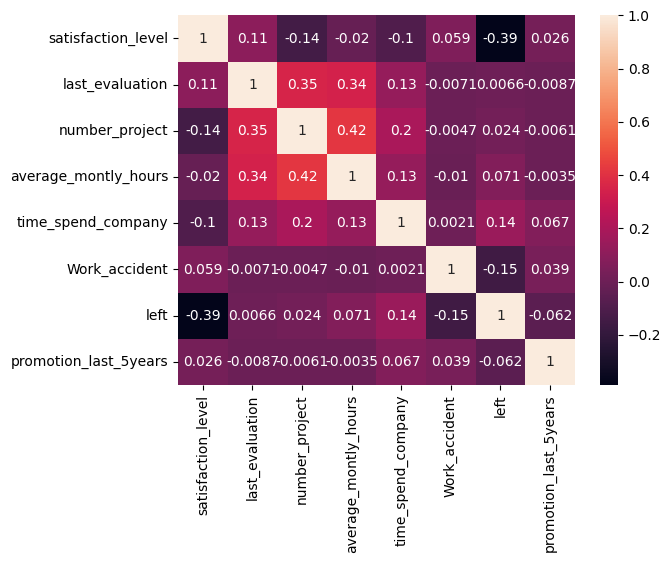

In [50]:
sns.heatmap(df.corr(), annot=True)

Bar Chart Showing relationship between employee retention and salaries

<AxesSubplot: xlabel='salary', ylabel='count'>

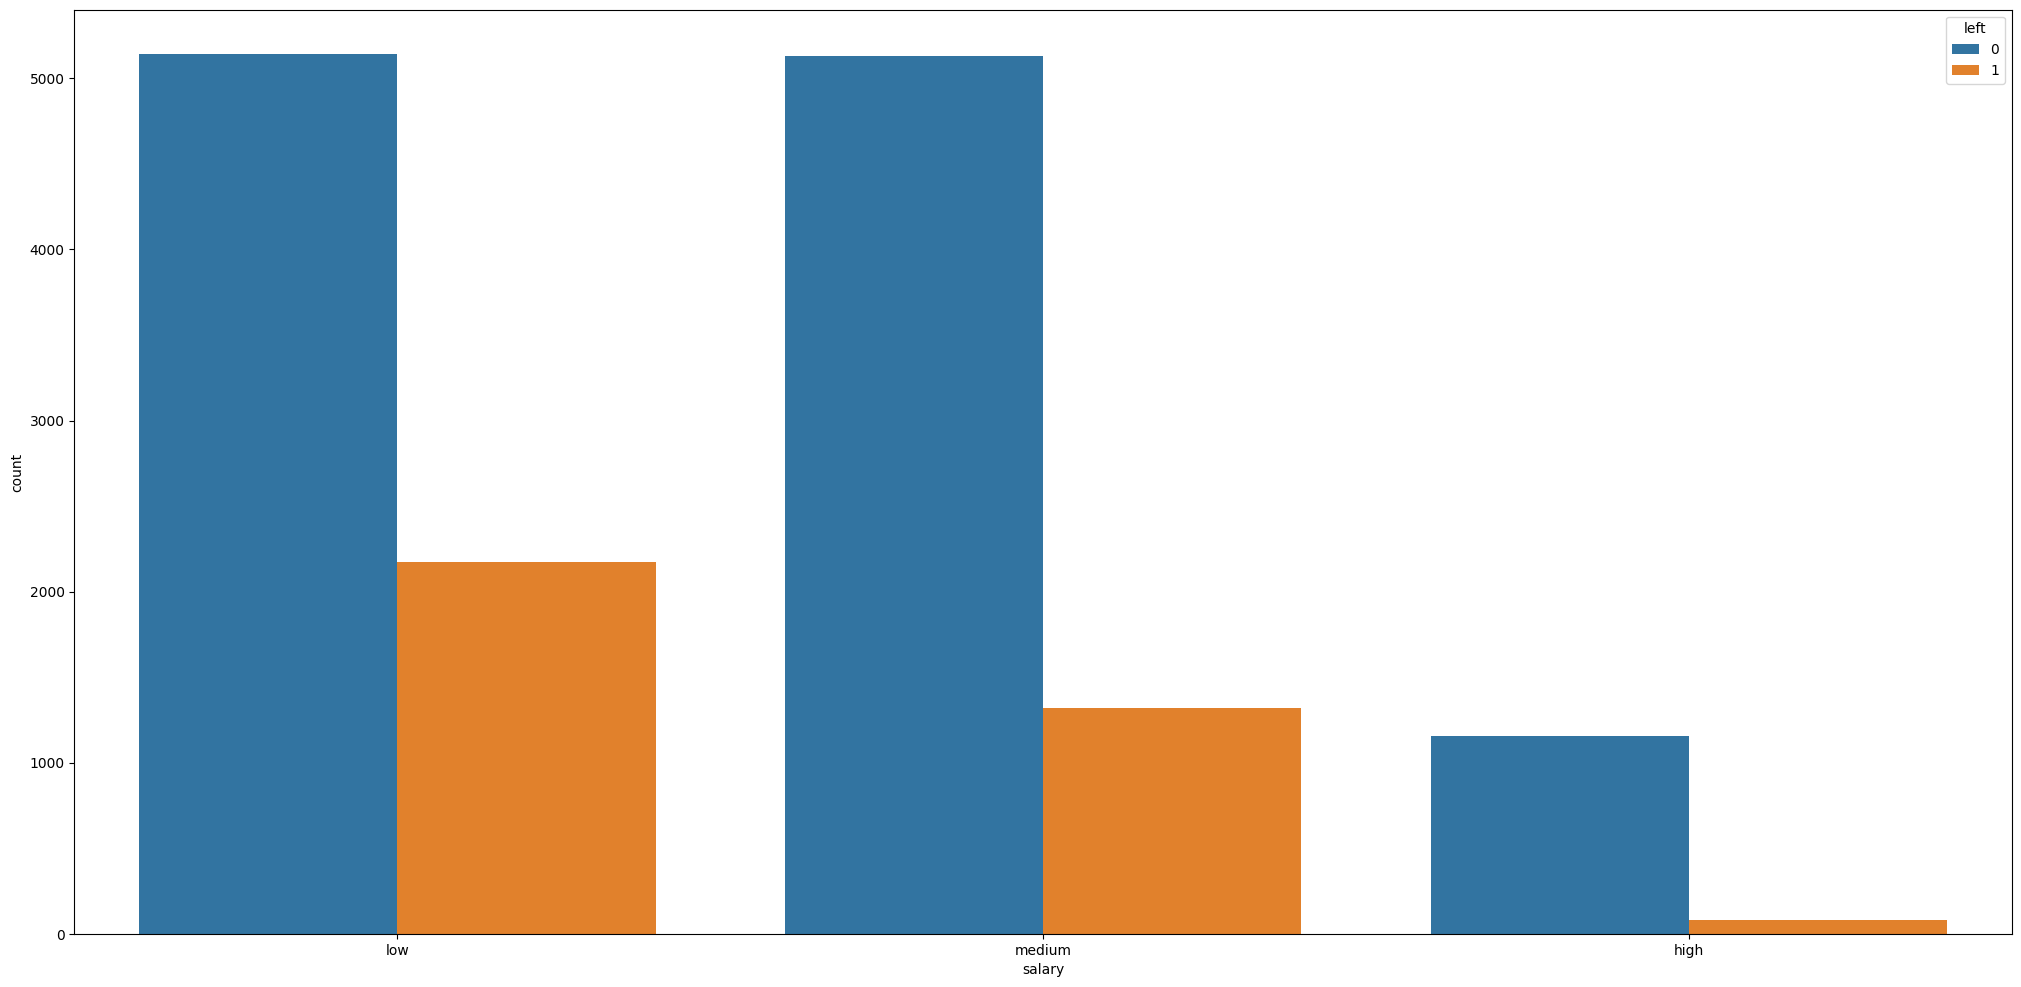

In [49]:
plt.figure(figsize=[25, 12])
sns.countplot(x = 'salary', hue = 'left', data = df)

Bar Chart showing correlation between department and employee retention

<AxesSubplot: xlabel='Department', ylabel='count'>

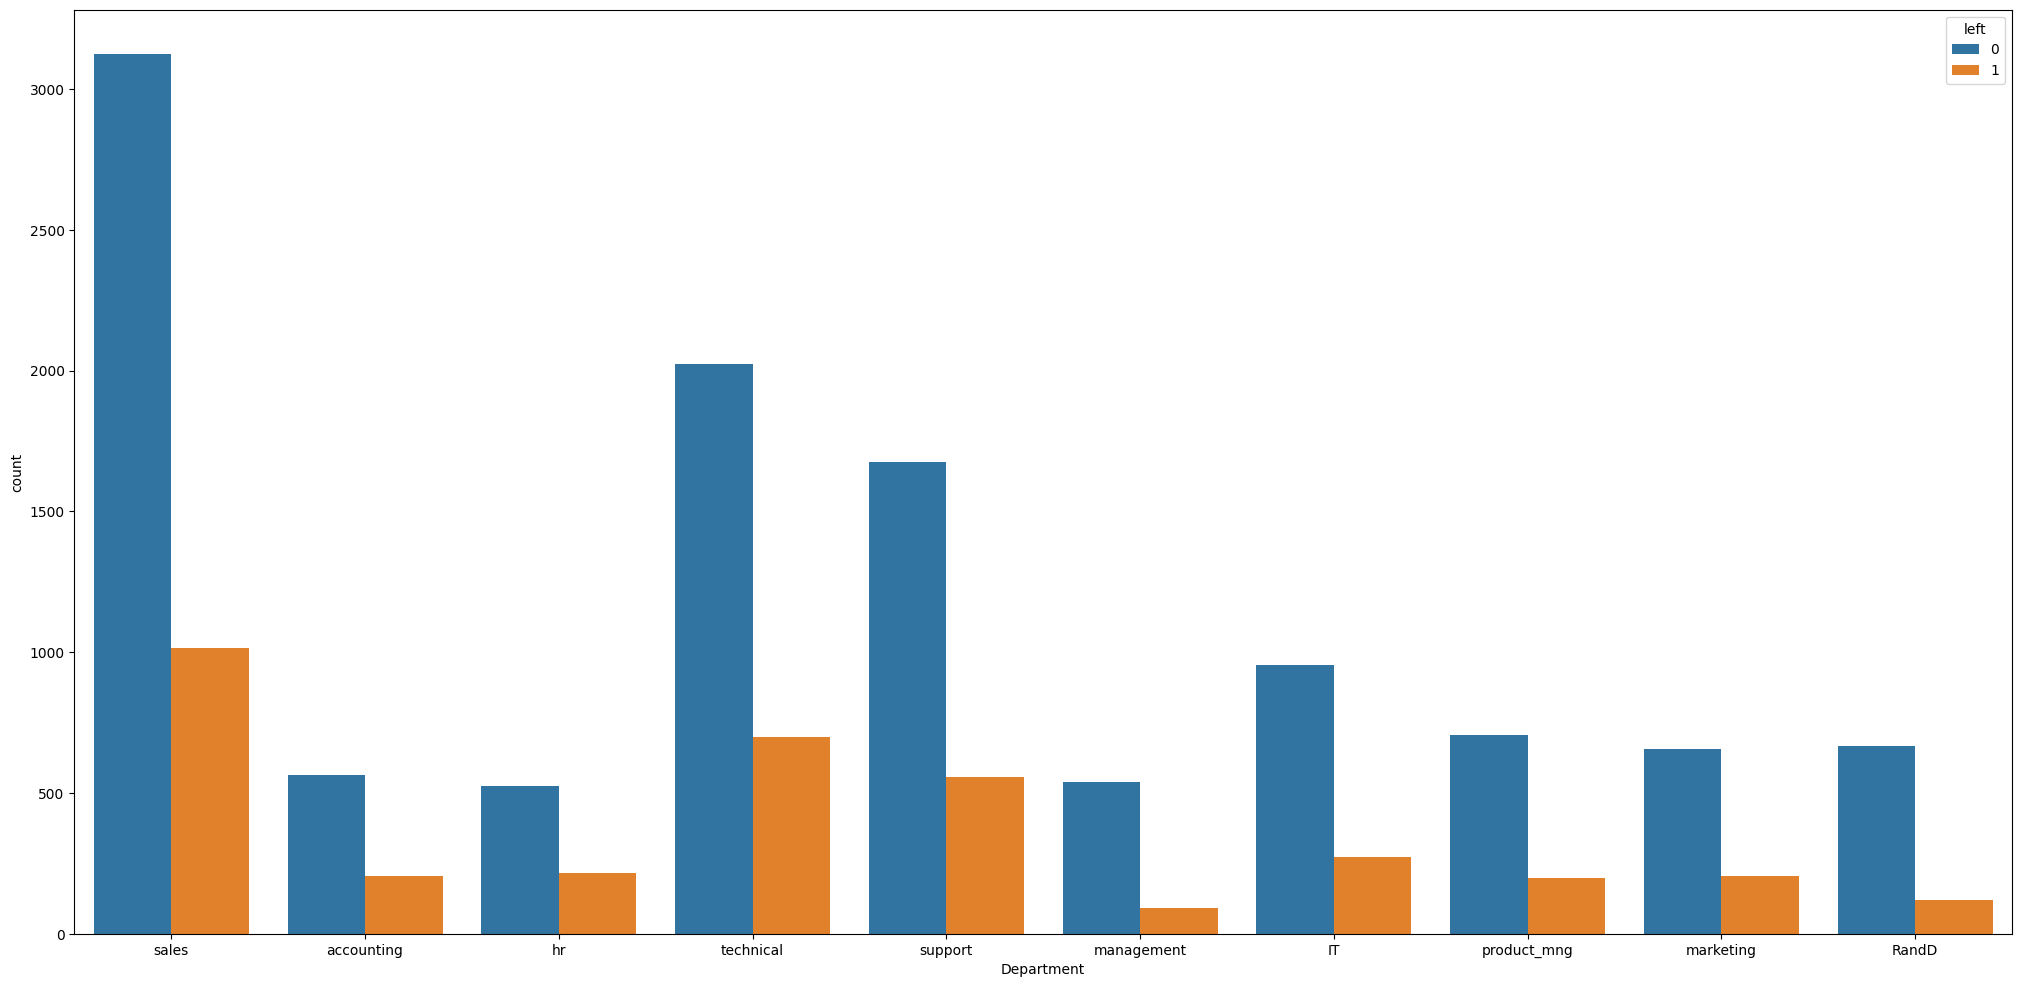

In [51]:
plt.figure(figsize=[25, 12])
sns.countplot(x = 'Department', hue = 'left', data = df)

Create Model

In [60]:
modata = df[['satisfaction_level', 'average_montly_hours', 'promotion_last_5years', 'salary']]
modata.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [62]:
dummies = pd.get_dummies(modata.salary)
dummies

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [66]:
merged = pd.concat([modata, dummies], axis= 'columns')
merged

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,high,low,medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0
...,...,...,...,...,...,...,...
14994,0.40,151,0,low,0,1,0
14995,0.37,160,0,low,0,1,0
14996,0.37,143,0,low,0,1,0
14997,0.11,280,0,low,0,1,0


In [67]:
final = merged.drop(['salary', 'medium'], axis= 'columns')
final.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low
0,0.38,157,0,0,1
1,0.80,262,0,0,0
2,0.11,272,0,0,0
3,0.72,223,0,0,1
4,0.37,159,0,0,1


In [68]:
x = final
y = df.left

In [69]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [70]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [71]:
model.fit(x_train, y_train)

LogisticRegression()

In [72]:
model.predict(x_test)

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [73]:
model.score(x_test, y_test)

0.7702222222222223